## Fruit and Vegetable detection for the 21st century's supermarket!

### Context of the challenge

In supermarkets, loose fruits and vegetables need to be weighted to determine the price to pay. Whether the weighting is done by employees or customers, it's not optimal.

The weighting is often time-consuming, especially on weekends and in the late afternoon when supermarkets are full : customers often have to wait in line for their turn and when their turn arrives they struggle to find the right item to select on the screen. They sometimes make mistakes or even deliberately fraud. Frauds like the "Banana Trick" (the fact of weighing expensive food items as cheap ones) are even easier now that people can use automatic cashier. When they are caught, cheaters merely feign ignorance or mistake to get away with it. Far from being marginal, studies in the UK reveal that 20% of customers use the banana trick and other similar tricks to steal supermarkets. 

To avoid fraud and increase customer satisfaction, we propose a system that automatically recognizes the type of fruit or vegetable while weighting. Such a system would also be useful to have a more up-to-date information on stocks in the section and could relieve employees from a tedious work.

The goal of this RAMP is to provide a proof of concept of the system and to assess its feasibility in a simpler case before moving on to more sophisticated development.

<img src="images/Banana_trick.jpg" alt="drawing" width="200"/><img src="images/balance.jpg" alt="drawing" width="200"/>

If this PoC is validated, we could :
- extend this system to classify more types of fruits and vegetables, and other loose goods
- take into account multiple varieties for one class (for example the system would have to be able to distinguish between beafsteak tomatos, cherry tomatos, cold & green tomatos,...)


We should keep in mind that this is only a PoC so the case is a simpler case. Developing these extensions would require to overcome new difficulties : much larger dataset, unbalanced dataset...
These difficulties could be addressed in a new challenge !

The technology addressed in this ramp is a serious challenge for lots of big companies and retailers. Amazon is developing a full automated supermarket where clients wouldn't need to checkout at all. The technology described above could be part of that supermarket and would be useful to the fruit and vegetable department.

The Fraunhofer-IOBS, a German research organization which is one of the biggest organisation for applied research and development services in Europe, is also developing an automated fruit recognition system for Super Markets and Food Stores (https://www.iosb.fraunhofer.de/servlet/is/33328/). As it is explained, the main challenge in this project is that same products may have different colors and textures due to their maturity or type.

Lots of recent scientific articles also address the subject of fruits and vegetables recognition. For instance, the article Robust Approach for Fruit and Vegetable Classification proposes a robust method to detect different varieties and species of fruits and vegetables. Those types of articles could inspire you to develop efficient algorithms !

<img src='images/Le-prix-des-fruits-et-legumes-a-flambe-cet-ete_width1024.jpg' alt='Fruits et légumes' width="80%"/>

Here are some usefull links if you're interested :

https://ac.els-cdn.com/S016816990900180X/1-s2.0-S016816990900180X-main.pdf?_tid=59001dbe-a574-41ca-be6d-82c8e1861665&acdnat=1548153802_e2ac8effa1d33d978a64b537f858468f

https://github.com/Horea94/Fruit-Images-Dataset

https://www.cs.toronto.edu/~kriz/cifar.html (cifar Dataset : contient un subdataset fuit and vegetable)

RobustApproachforFruitandVegetableClassification (article PDF)

### Goal of the challenge

For this PoC, the number of classes has been limited to **5 fruits** (apple, banana, orange, grape, tomato) and **5 vegetables** (carrot, onion, zucchini, potato, lettuce). To create the dataset we mixed results from Bing Image Search Engine and Flickr. We used their APIs in scripts to download images, and then manually removed any irrelevant images. That was time consuming, therefore we chose to limit the size of dataset to approximatively 500 images per class. As the background enviromnent is a supermarket, images without background are not enough. It was important to have a dataset both with and without backgrounds.

Due to the variance of results provided by Bing and Flickr, it proved difficult to gather 500 pictures per class. By fetching 750 pictures from Bing Search and another 750 from Flickr, we weren't able to have 500 pictures for some classes, but mixing both applications allowed us to have a minimum of ~350 images by class, which gives us a minimum of data for classification. The dataset is partitioned into folders for each class, containing images saved in PNG format. Each folder has the following number of pictures: **apple, banana, orange, grape, tomato, carrot ), onion (500), zucchini (410), potato, lettuce**.

The goal of this system is to determine the class of the product to determine its price (per kg). If the system predicts a wrong class, the price will be inaccurate. If the price is lower than the real one, companies will loose money, if it's higher clients will be unsatisfied and claim for a discount. The loss of income can therefore be direclty related to the accuracy of the algorithm. As the goal of the system is to be completely autonomous, it needs to have a high accuracy before being released. For the moment, we have an accuracy of *50 %* for our PoC, we would like to have an accuracy of at least *80 %* (fraud is estimated to cause a 20% loss) to validate this PoC and go further in experimentation.



### Scores

We will compute the score taking into account 2 metrics : the accuracy and a loss based on the average price per kilo of each product.

#### Accuracy

The accuracy is an important metric because the system can only be deployed in real supermarkets if the accuracy is high enough. The accuracy can be expresed as :
<img src="images/accuracy.jpg" alt="drawing" width="250"/>

#### Loss based on average price per kilo for each product

Our second metric quantifies the loss due to a wrong prediction of the class. Two cases have to be considered :
- if the price of the predicted class is lower than the price of the true class, the loss is simply the difference between the 2 prices
- if the price of the predicted class is heigher than the true class, we will obviously have to pay back the difference (but this doesn't count as a loss), but we will also have to make a discount to avoid affecting the customer satisfaction). In the following we will consider a systematic discount of 50 % whenever the algorithm predicts the wrong class and when the predicted price is higher than the true price.

The formula for this loss is :
<img src="images/loss1.jpg" alt="drawing" width="400"/>

<img src="images/def_pi.jpg" alt="drawing" width="150"/>

We will take the following values for the price per kilo for each class :

In [ ]:
import pandas as pd
data_prices = {'item': ['apple', 'banana', 'orange', 'grape', 'tomato', 'oignon', 'zucchini', 'potatoe', 'letuce','carrot'], 'Medium price': [2.50, 2.00, 1.50, 6.00, 3.00, 1.50, 3.50, 1.50, 3.00, 2.00]}
Prices = pd.DataFrame(data = data_prices)
Prices = Prices.set_index('item')
Prices

#### Score

The score takes into account both the accuracy and the loss. Ideally we would like to sum the loss with the 1 - the opposite of the accuracy ; the best score would therefore be the smallest score. However the 2 quantities don't have the same dimension. We therefore introduce the following adimensional loss, where we divide each term of the previous loss by the true price :
<img src="images/lossa.jpg" alt="drawing" width="200"/>


We then obtain the following expression for our score :
<img src="images/Score.jpg" alt="drawing" width="200"/>

The perfect prediction would be a loss equal to zero and the smaller the score, the better the score.

#### KPI

The 2 parts of the score can be used as KPIs. A high accuracy is essential because without it, the deployement of the system is not feasible. Prices can change and therefore the algorithm needs to be able to be robust to them.

The loss based on the prices is also an important indicator because it quantifies the efficiency of the algorithm in terms of loss of income. If we compute this loss on the total sales, we obtain a quantity which can be compared to the loss of income due to fraud and more generally to the operational costs of a supermarket. 

# Exploratory data analysis

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib import cm

In [2]:
df = pd.read_csv('data/train.csv')
X_df = df['id']
y_df = df['class']
X = X_df.values
y = y_df.values

In [3]:
len(df)

4768

In [4]:
labels_counts_df = df.groupby('class').count()
labels_counts_df = labels_counts_df.rename(columns={'id': 'count'})
class_codes_df = pd.read_csv('data/class_codes.csv', index_col='class')
labels_counts_df = pd.merge(
    class_codes_df, labels_counts_df, left_index=True, right_index=True)
labels_counts_df = labels_counts_df.sort_values('count', ascending=False)
labels_counts_df

,fruit_name,count
class,,
6,laitue,526
2,raisin,492
3,carotte,488
0,orange,482
5,oignon,480
8,banane,474
1,tomate,467
4,pomme,465
7,courgette,460


In [5]:
len(labels_counts_df)

10

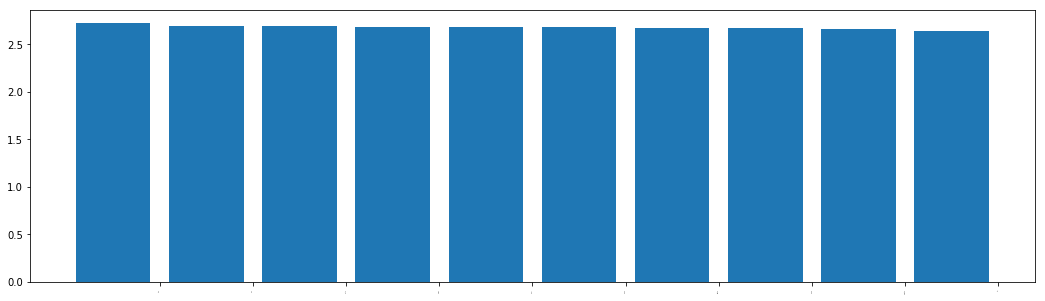

In [6]:
plt.figure(figsize=(18, 5))

x = np.arange(len(labels_counts_df))
plt.bar(x, np.log10(labels_counts_df['count']))
plt.xticks(x + 0.5, labels_counts_df['fruit_name'], rotation=90, fontsize=1);

In [7]:
nb_rows = 4
nb_cols = 4
nb_elements = nb_rows * nb_cols
# change the label here to see other classes
label = 1

labels_counts_df.loc[label]

fruit_name    tomate
count            467
Name: 1, dtype: object

/home/alexandre/Projects/master/datacamp/collab/clbenv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


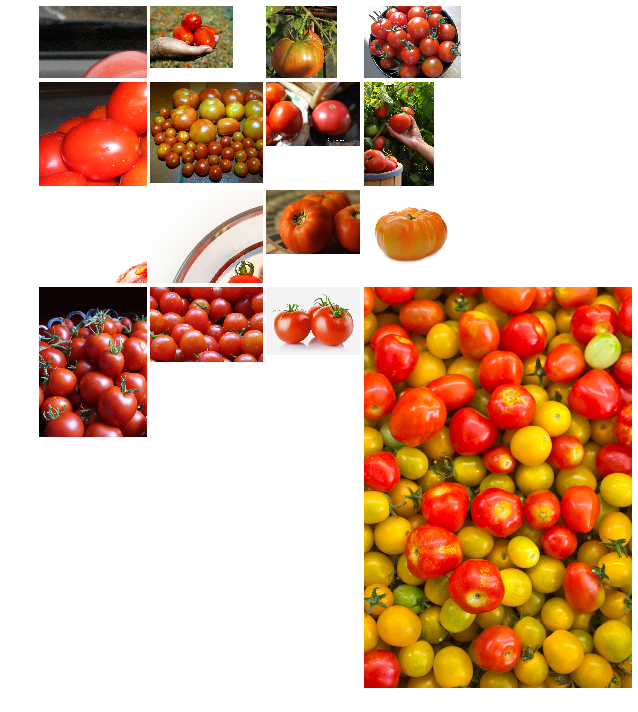

In [8]:
X_given_label = X[y==label]

subsample = np.random.choice(
    X_given_label, replace=False, size=min(nb_elements, len(X_given_label)))

fig = plt.figure(figsize=(10, 10))
grid = AxesGrid(fig, 111, # similar to subplot(141)
                nrows_ncols = (nb_rows, nb_cols),
                axes_pad = 0.05,
                label_mode = "1",
)
for i, image_id in enumerate(subsample):
    filename = 'data/imgs/{}'.format(image_id)
    image = imread(filename)
    im = grid[i].imshow(image/255.)
    grid[i].axis('off')
plt.tight_layout()

In [9]:
n_subsample = 1000
shapes = np.empty((n_subsample, 3))
for i, image_id in enumerate(X[:n_subsample]):
    filename = 'data/imgs/{}'.format(image_id)
    image = imread(filename)
    shapes[i] = image.shape

/home/alexandre/Projects/master/datacamp/collab/clbenv/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [10]:
shapes_df = pd.DataFrame(shapes,columns=['height', 'width', 'count'])
shapes_df.groupby(['height', 'width']).count().sort_values('count', ascending=False)

count
height width         
768.0  1024.0      25
683.0  1024.0      22
1200.0 1600.0      21
1000.0 1000.0      17
1536.0 2048.0      16
1200.0 1200.0      14
600.0  600.0       13
1024.0 1024.0      11
       768.0       10
600.0  800.0       10
2592.0 3872.0      10
800.0  800.0        9
960.0  1280.0       9
720.0  1280.0       8
2048.0 1536.0       8
480.0  640.0        8
3456.0 5184.0       8
2848.0 4288.0       6
800.0  1200.0       6
612.0  612.0        6
860.0  860.0        6
2448.0 3264.0       6
750.0  1000.0       6
1704.0 2272.0       6
2848.0 4272.0       5
681.0  1024.0       5
333.0  500.0        5
3072.0 4608.0       5
300.0  400.0        5
2736.0 3648.0       5
...               ...
720.0  1270.0       1
752.0  500.0        1
750.0  497.0        1
749.0  1000.0       1
741.0  1024.0       1
734.0  1100.0       1
       979.0        1
732.0  1444.0       1
728.0  1024.0       1
724.0  965.0        1
723.0  1200.0       1
       1023.0       1
722.0  1024.0       1
       1000.0       1
720.0  1000.0       1
691.0  1024.0       1
720.0  960.0        1
       659.0        1
       576.0        1
       540.0        1
716.0  1006.0       1
713.0  1426.0       1
       1042.0       1
712.0  1400.0       1
708.0  950.0        1
704.0  528.0        1
697.0  1024.0       1
693.0  693.0        1
692.0  1024.0       1
6750.0 12000.0      1

[589 rows x 1 columns]

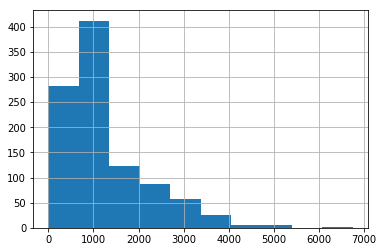

In [11]:
shapes_df['height'].hist()

# Starting Model

In [12]:
%%file submissions/starting_kit/image_classifier.py
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import Adam
from rampwf.workflows.image_classifier import get_nb_minibatches
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


class ImageClassifier(object):

    def __init__(self):
        self.batch_size = 5
        self.img_width, self.img_height = 32, 32
        self.model = Sequential()
        self._build_model()
    
    def _build_model(self):
        
        # Forme de l'input en fonction du backend
        if K.image_data_format() == 'channels_first':
            self.input_shape = (3, self.img_width, self.img_height)
        else:
            self.input_shape = (self.img_width, self.img_height, 3)

        self.model.add(Conv2D(32, (3, 3), input_shape=self.input_shape))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))

        self.model.add(Conv2D(64, (3, 3)))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        
        self.model.add(Conv2D(64, (3, 3)))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))

        self.model.add(Flatten())
        self.model.add(Dense(64))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.5))
        
        # Compute the probabilities of the ten classes
        self.model.add(Dense(10)) 
        self.model.add(Activation('softmax'))

        self.model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

    def _transform(self, x):
        x = resize(x, (self.img_width, self.img_height), preserve_range=True, anti_aliasing=False)
        # bringing input between 0 and 1
        x = x / 255.
        return x

    def _build_train_generator(self, img_loader, indices, batch_size,
                               shuffle=False):
        indices = indices.copy()
        nb = len(indices)
        X = np.zeros((batch_size, self.img_width, self.img_height, 3))
        Y = np.zeros((batch_size, 10))
        while True:
            if shuffle:
                np.random.shuffle(indices)
            for start in range(0, nb, batch_size):
                stop = min(start + batch_size, nb)
                # load the next minibatch in memory.
                # The size of the minibatch is (stop - start),
                # which is `batch_size` for the all except the last
                # minibatch, which can either be `batch_size` if
                # `nb` is a multiple of `batch_size`, or `nb % batch_size`.
                bs = stop - start
                Y[:] = 0
                for i, img_index in enumerate(indices[start:stop]):
                    x, y = img_loader.load(img_index)
                    if len(x.shape)!=3 or x.shape[2]!=3:
                        print('Image passed')
                        Y[i, 0] = 1
                        continue
                    x = self._transform(x)
                    X[i] = x
                    Y[i, y] = 1
                yield X[:bs], Y[:bs]

    def _build_test_generator(self, img_loader, batch_size):
        nb = len(img_loader)
        X = np.zeros((batch_size, self.img_width, self.img_height, 3))
        while True:
            for start in range(0, nb, batch_size):
                stop = min(start + batch_size, nb)
                # load the next minibatch in memory.
                # The size of the minibatch is (stop - start),
                # which is `batch_size` for the all except the last
                # minibatch, which can either be `batch_size` if
                # `nb` is a multiple of `batch_size`, or `nb % batch_size`.
                bs = stop - start
                for i, img_index in enumerate(range(start, stop)):
                    x = img_loader.load(img_index)
                    x = self._transform(x)
                    X[i] = x
                yield X[:bs]

    def fit(self, img_loader):
        np.random.seed(24)
        nb = len(img_loader)
        nb_train = int(nb * 0.9)
        nb_valid = nb - nb_train
        indices = np.arange(nb)
        np.random.shuffle(indices)
        ind_train = indices[0: nb_train]
        ind_valid = indices[nb_train:]

        gen_train = self._build_train_generator(
            img_loader,
            indices=ind_train,
            batch_size=self.batch_size,
            shuffle=True
        )
        gen_valid = self._build_train_generator(
            img_loader,
            indices=ind_valid,
            batch_size=self.batch_size,
            shuffle=True
        )
        self.model.fit_generator(
            gen_train,
            steps_per_epoch=get_nb_minibatches(nb_valid, self.batch_size),
            epochs=1,
            max_queue_size=16,
            workers=1,
            use_multiprocessing=False,
            validation_data=gen_valid,
            validation_steps=get_nb_minibatches(nb_valid, self.batch_size),
            verbose=1
        )

    def predict_proba(self, img_loader):
        nb_test = len(img_loader)
        gen_test = self._build_test_generator(img_loader, self.batch_size)
        return self.model.predict_generator(
            gen_test,
            steps=get_nb_minibatches(nb_test, self.batch_size),
            max_queue_size=16,
            workers=1,
            use_multiprocessing=False,
            verbose=0
        )

Overwriting submissions/starting_kit/image_classifier.py


In [13]:
!ramp_test_submission

Testing Fruits and vegetables classification (10 classes)
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
Using TensorFlow backend.
Epoch 1/1
/home/alexandre/Projects/master/datacamp/collab/clbenv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
Image passed
2019-01-31 15:14:04.028579: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-01-31 15:14:05.285622: W tensorflow/core/framework/allocator.cc:122] Allocation of 19663488 exceeds 10% of system memory.
2019-01-31 15:14:05.285956: W tensorflow/core/framework/allocator.cc:122] Allocation of 19663488 exceeds 10% of system memory.
2019-01-31 15:14:05.297214: W tensorflow/core/framework/allocator.cc:122] Alloca